# Introduction

This lab explores how fuzzy logic supports cybersecurity analytics by handling uncertainty in intrusion indicators. Using scikit‑fuzzy, you will construct a fuzzy inference system to estimate intrusion risk from ambiguous security signals.

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define Input Variables (Cybersecurity Metrics)

- Login Failures (0–50 attempts / min)
- Traffic Anomaly Score (0–100, from ML anomaly detection system)

In [3]:
# Inputs (Antecedents)
login_fail = ctrl.Antecedent(np.arange(0, 51, 1), 'login_fail')
traffic_anom = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_anom')

# Output (Consequent)
intrusion_risk = ctrl.Consequent(np.arange(0, 101, 1), 'intrusion_risk')

# Define Membership Functions

In [4]:
# Login failure rate (per minute)
login_fail['low']    = fuzz.trimf(login_fail.universe, [0, 0, 15])
login_fail['medium'] = fuzz.trimf(login_fail.universe, [10, 25, 40])
login_fail['high']   = fuzz.trimf(login_fail.universe, [30, 50, 50])

# Traffic anomaly score (from some anomaly detector)
traffic_anom['normal']      = fuzz.trimf(traffic_anom.universe, [0, 0, 40])
traffic_anom['suspicious']  = fuzz.trimf(traffic_anom.universe, [30, 50, 70])
traffic_anom['abnormal']    = fuzz.trimf(traffic_anom.universe, [60, 100, 100])

# Intrusion risk level
intrusion_risk['low']    = fuzz.trimf(intrusion_risk.universe, [0, 0, 40])
intrusion_risk['medium'] = fuzz.trimf(intrusion_risk.universe, [30, 50, 70])
intrusion_risk['high']   = fuzz.trimf(intrusion_risk.universe, [60, 100, 100])


## Visualize Membership Functions

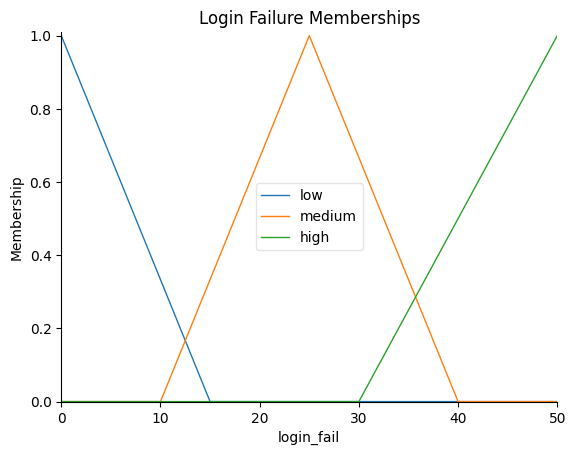

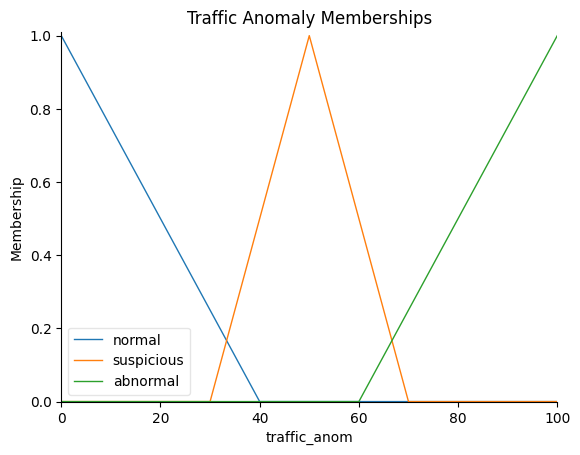

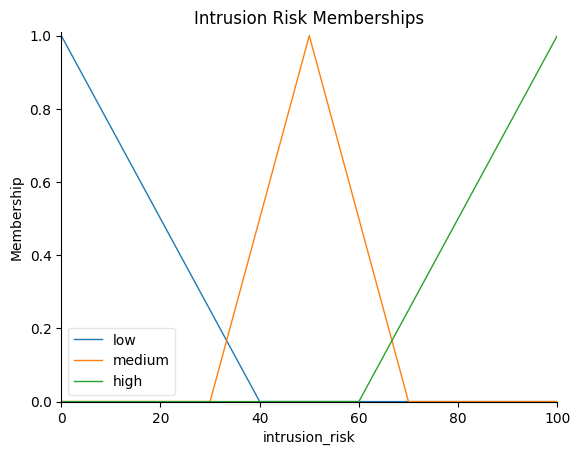

In [5]:
login_fail.view()
plt.title("Login Failure Memberships")
plt.show()

traffic_anom.view()
plt.title("Traffic Anomaly Memberships")
plt.show()

intrusion_risk.view()
plt.title("Intrusion Risk Memberships")
plt.show()

# Define Fuzzy Rules

In [6]:
rule1 = ctrl.Rule(login_fail['high'] & traffic_anom['abnormal'],
                  intrusion_risk['high'])

rule2 = ctrl.Rule(login_fail['medium'] & traffic_anom['suspicious'],
                  intrusion_risk['medium'])

rule3 = ctrl.Rule(login_fail['low'] & traffic_anom['normal'],
                  intrusion_risk['low'])

# This rule captures “any very strong signal is enough”
rule4 = ctrl.Rule(login_fail['high'] | traffic_anom['abnormal'],
                  intrusion_risk['high'])

# Build Control System

In [7]:
intrusion_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
intrusion_sim = ctrl.ControlSystemSimulation(intrusion_ctrl)

# Test

Login failures per minute: 22
Traffic anomaly score: 67
Computed intrusion risk: 67.06374203224591


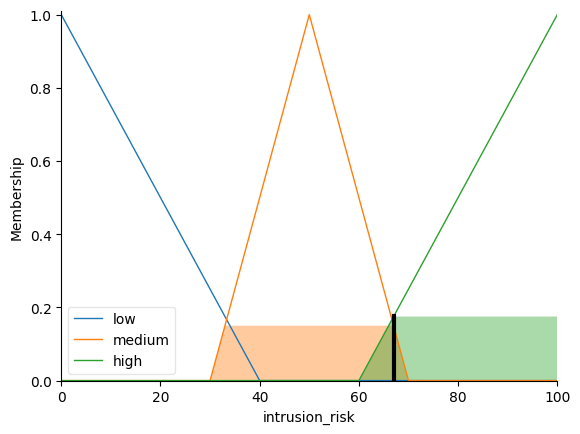

In [8]:
intrusion_sim.input['login_fail'] = 22
intrusion_sim.input['traffic_anom'] = 67

intrusion_sim.compute()

print("Login failures per minute:", 22)
print("Traffic anomaly score:", 67)
print("Computed intrusion risk:", intrusion_sim.output['intrusion_risk'])

intrusion_risk.view(sim=intrusion_sim)
plt.show()

# Reflection

- Experiment with at least 3 different combinations of inputs and record the risk values.
- Modify one membership function (e.g., make login_fail['high'] more aggressive) and observe the change.
- Discuss: Compare this fuzzy system to a crisp rule:
    - if login_fail > 20 and anomaly_score > 60 then risk = high How does fuzzy logic better capture uncertainty and partial evidence?